In [16]:
from google.colab import files

uploaded = files.upload()


Saving Housing.csv to Housing (1).csv


In [17]:
!pip install scikit-learn


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset
file_path = 'Housing.csv'
housing_data = pd.read_csv(file_path)

# Separate features and target variable
X = housing_data.drop(columns=['price'])
y = housing_data['price']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
msle = mean_squared_log_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r_squared:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.3f}")


Mean Squared Error (MSE): 1754318687330.70
Mean Absolute Error (MAE): 970043.40
R-squared (R²): 0.653
Mean Absolute Percentage Error (MAPE): 21.04%
Mean Squared Logarithmic Error (MSLE): 0.065


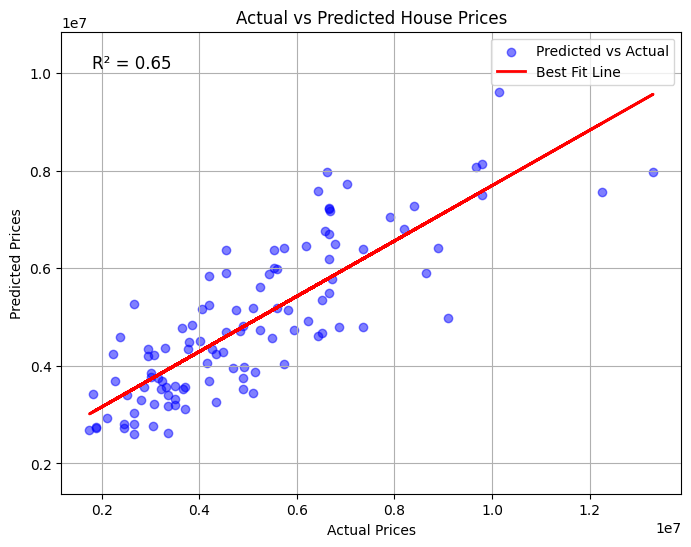

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Ensure no NaN or infinite values
mask = np.isfinite(y_test) & np.isfinite(y_pred)
y_test = y_test[mask]
y_pred = y_pred[mask]

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')

# Plot the best-fit line
best_fit_line = np.poly1d(np.polyfit(y_test, y_pred, 1))
plt.plot(y_test, best_fit_line(y_test), color='red', linewidth=2, label='Best Fit Line')

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Add labels, title, and legend
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

# Display R-squared on the plot, rounded to 2 decimal places
plt.text(0.05, 0.95, f'R² = {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Ensure the axes are equal for better comparison
plt.axis('equal')

# Grid for better readability
plt.grid(True)

# Show the plot
plt.show()
